In [1]:
import scipy as sp

In [2]:
"""
scipy.linalg, scipy.special, scipy.integrate, scipy.optimize, scipy.interpolate, scipy.fftpack,
scipy.signal, scipy.stats, scipy.ndimage, scipy.io
"""

'\nscipy.linalg, scipy.special, scipy.integrate, scipy.optimize, scipy.interpolate, scipy.fftpack,\nscipy.signal, scipy.stats, scipy.ndimage, scipy.io\n'

In [3]:
import numpy as np
from scipy import linalg

In [5]:
A = np.array([[1,2], [3,4]])
print(A)
B = linalg.inv(A)
print(B)

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In [6]:
b = np.array([[5,6]])
print(b.T)

[[5]
 [6]]


In [7]:
#Denklem takımlarının çözümü
A = np.array([[1,3,5], [2,5,1], [2,3,8]])
print(A)
b = np.array([[10], [8], [3]])
print(b)
print("linalg.inv(A).dot(b) Matris tersi ile denklem takımının çözümü")
print(linalg.inv(A).dot(b))  #slow
print("np.linalg.solve(A, b) ile denklem takımı çözümü")
print(np.linalg.solve(A, b)) #fast

[[1 3 5]
 [2 5 1]
 [2 3 8]]
[[10]
 [ 8]
 [ 3]]
linalg.inv(A).dot(b) Matris tersi ile denklem takımının çözümü
[[-9.28]
 [ 5.16]
 [ 0.76]]
np.linalg.solve(A, b) ile denklem takımı çözümü
[[-9.28]
 [ 5.16]
 [ 0.76]]


In [8]:
#İntegral alma
from scipy import integrate
x2 = lambda x : x**2
I = integrate.quad(x2, 0, 6)
print(I)

(72.00000000000001, 7.993605777301129e-13)


In [10]:
#Bessel fonksiyonu
import scipy.special as spl
result = integrate.quad(lambda x : spl.jv(2.5, x), 0, 4.5)
print(result)

(1.1178179380783244, 7.866317216380707e-09)


In [11]:
#Türev
from scipy.misc import derivative
def f(x):
    return x**3 + x**2
D = derivative(f, 1.0, dx=1e-6)
print(D)

4.999999999921734


In [12]:
#Linear Regression

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataset = pd.read_csv('data/Salary_Data.csv')

In [15]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
dataset.shape

(30, 2)

In [18]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

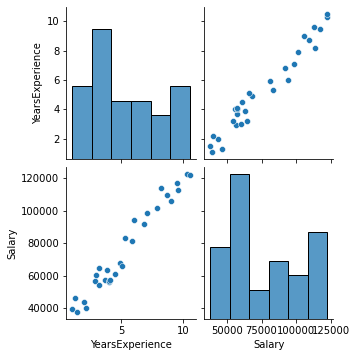

In [21]:
sns.pairplot(dataset)

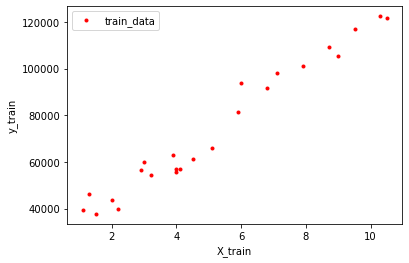

In [22]:
#Train data
plt.plot(X_train, y_train, 'r.', label = 'train_data')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

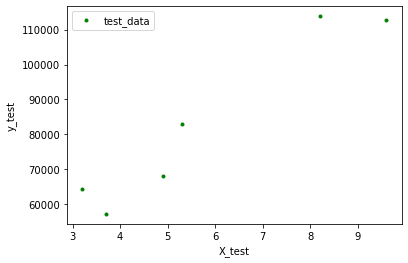

In [23]:
#Test data
plt.plot(X_test, y_test, 'g.', label = 'test_data')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

In [24]:
#Modeli Eğitme
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = regressor.predict(X_test).round(1)

In [26]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Salary', 'Predicted Salary'])
hesaplama

,Original Salary,Predicted Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


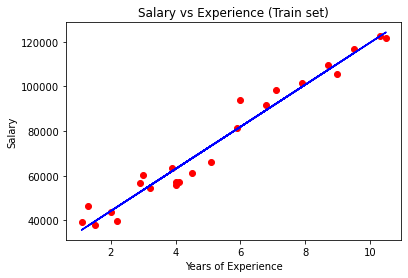

In [27]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

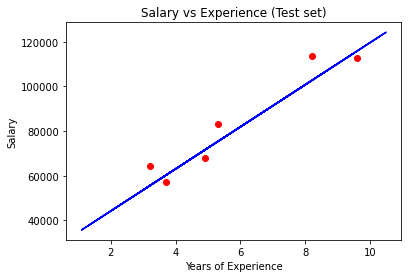

In [28]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [29]:
#Polinom Lineer Regresyon
#y = a + bx + cx^2 + .... + nx^n + ....

In [30]:
dataset = pd.read_csv('data/Position_Salaries.csv')

In [31]:
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [32]:
dataset = dataset.drop(['Position'], axis = True)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


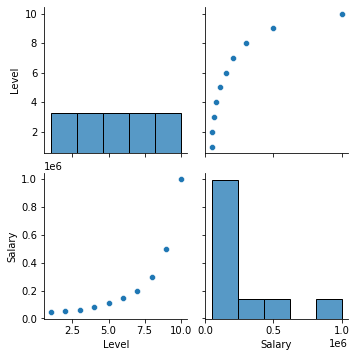

In [34]:
sns.pairplot(dataset)

In [35]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [40]:
print("Training Accuracy : ", lin_reg.score(X_train, y_train))
print("Testing Accuracy : ", lin_reg.score(X_test, y_test))

Training Accuracy :  0.6366049276570868
Testing Accuracy :  0.8451346684575975


In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [42]:
print("Training Accuracy : ", lin_reg_2.score(X_poly, y_train))
print("Testing Accuracy : ", lin_reg_2.score(X_poly_test, y_test))

Training Accuracy :  0.9995857211026754
Testing Accuracy :  0.9714666803841844


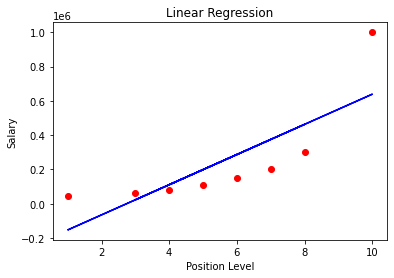

In [43]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

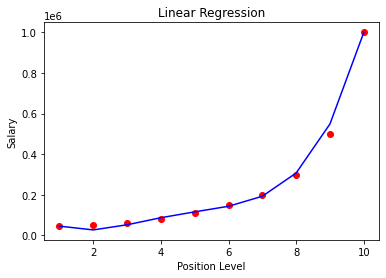

In [45]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [46]:
#Multiple Linear Regression
#y = b0 + b1x1 + b2x2 + ... + bnxn